qtc (Python 3.10.8)에 연결됨

In [1]:
from configparser import ConfigParser

import numpy as np
from numpy import ndarray
import xarray as xr
import kneed
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
from jhelabtoolkit.io.nanosurf import nanosurf
from jhelabtoolkit.utils.plotting import configure_matplotlib_defaults

configure_matplotlib_defaults()

filepath = "data/20231110_onion/Image026676.nid"
config, data = nanosurf.read_nid(filepath)

FileNotFoundError: [Errno 2] No such file or directory: 'data/20231110_onion/Image026676.nid'

In [ ]:
def get_sampling_rate(nid_config: ConfigParser) -> float:
    spec_config = dict(config[r"DataSet\DataSetInfos\Spec"])
    num_points = int(spec_config["data points"])
    # May later use the pint library to parse unitful quantites
    modulation_time = float(spec_config["modulation time"].split(" ")[0])
    return num_points / modulation_time

get_sampling_rate(config)

: 

In [ ]:
forward, backward = data["spec forward"], data["spec backward"]

forward

: 

In [ ]:
def get_z_and_defl(spectroscopy_data: xr.DataArray) -> tuple[ndarray, ndarray]:
    piezo_z = spectroscopy_data["z-axis sensor"].to_numpy()
    defl = spectroscopy_data["deflection"].to_numpy()
    return piezo_z.squeeze(), defl.squeeze()


def calc_tip_distance(piezo_z_pos: ndarray, deflection: ndarray) -> ndarray:
    return piezo_z_pos - deflection


def find_contact_point(distance: ndarray, deflection: ndarray) -> float:
    # Right now, only support 1D arrays of tip_distance and tip_deflection
    locator = kneed.KneeLocator(
        distance,
        deflection,
        S=10,
        curve="convex",
        direction="increasing",
        interp_method="polynomial",
        polynomial_degree=7,
    )
    return locator.knee


def find_contact_point1(deflection: ndarray, N: int) -> ndarray:
    # Ratio of Variance
    rov = np.array([])
    length = np.arange(np.size(deflection))
    rov = np.array(
        [
            np.append(
                rov,
                np.array(
                    [
                        np.var(deflection[i + 1 : i + N])
                        / np.var(deflection[i - N : i - 1])
                    ]
                ),
            )
            for i in length
        ]
    ).flatten()
    rov = rov[N : np.size(rov) - N]
    idx = np.argmax(rov)
    return rov, idx, rov[idx]


def fit_baseline_polynomial(
    distance: ndarray, deflection: ndarray, contact_point: float = 0.0, degree: int = 1
) -> Polynomial:
    pre_contact = distance < contact_point
    domain = (np.amin(distance), np.amax(distance))
    return Polynomial.fit(
        distance[pre_contact], deflection[pre_contact], deg=degree, domain=domain
    )

: 

In [ ]:
z_fwd, defl_fwd = get_z_and_defl(forward)
z_bwd, defl_bwd = get_z_and_defl(backward)
dist_fwd = calc_tip_distance(z_fwd, defl_fwd)
dist_bwd = calc_tip_distance(z_bwd, defl_bwd)
cp = find_contact_point(dist_fwd, defl_fwd)

: 

In [2]:
from configparser import ConfigParser

import numpy as np
from numpy import ndarray
import xarray as xr
import kneed
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
from jhelabtoolkit.io.nanosurf import nanosurf
from jhelabtoolkit.utils.plotting import configure_matplotlib_defaults

configure_matplotlib_defaults()

filepath = "data/20231110_onion/Image026676.nid"
config, data = nanosurf.read_nid(filepath)

FileNotFoundError: [Errno 2] No such file or directory: 'data/20231110_onion/Image026676.nid'

In [3]:
def get_sampling_rate(nid_config: ConfigParser) -> float:
    spec_config = dict(config[r"DataSet\DataSetInfos\Spec"])
    num_points = int(spec_config["data points"])
    # May later use the pint library to parse unitful quantites
    modulation_time = float(spec_config["modulation time"].split(" ")[0])
    return num_points / modulation_time

get_sampling_rate(config)

NameError: name 'config' is not defined

In [4]:
forward, backward = data["spec forward"], data["spec backward"]

forward

NameError: name 'data' is not defined

In [5]:
from configparser import ConfigParser

import numpy as np
from numpy import ndarray
import xarray as xr
import kneed
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
from jhelabtoolkit.io.nanosurf import nanosurf
from jhelabtoolkit.utils.plotting import configure_matplotlib_defaults

configure_matplotlib_defaults()

filepath = "data/20231110_onion/Image02676.nid"
config, data = nanosurf.read_nid(filepath)

In [6]:
def get_sampling_rate(nid_config: ConfigParser) -> float:
    spec_config = dict(config[r"DataSet\DataSetInfos\Spec"])
    num_points = int(spec_config["data points"])
    # May later use the pint library to parse unitful quantites
    modulation_time = float(spec_config["modulation time"].split(" ")[0])
    return num_points / modulation_time

get_sampling_rate(config)

65536.0

In [7]:
forward, backward = data["spec forward"], data["spec backward"]

forward

<xarray.Dataset>
Dimensions:        (z-axis: 319, specpoint: 1)
Coordinates:
  * z-axis         (z-axis) float64 -5.5e-06 -5.489e-06 ... -2.077e-06
  * specpoint      (specpoint) float64 1.0
Data variables:
    deflection     (z-axis, specpoint) float64 4.951e-11 1.381e-10 ... 1.505e-08
    z-axis sensor  (z-axis, specpoint) float64 -2.844e-06 ... 1.026e-06
Attributes:
    name:     None

In [8]:
def get_z_and_defl(spectroscopy_data: xr.DataArray) -> tuple[ndarray, ndarray]:
    piezo_z = spectroscopy_data["z-axis sensor"].to_numpy()
    defl = spectroscopy_data["deflection"].to_numpy()
    return piezo_z.squeeze(), defl.squeeze()


def calc_tip_distance(piezo_z_pos: ndarray, deflection: ndarray) -> ndarray:
    return piezo_z_pos - deflection


def find_contact_point(distance: ndarray, deflection: ndarray) -> float:
    # Right now, only support 1D arrays of tip_distance and tip_deflection
    locator = kneed.KneeLocator(
        distance,
        deflection,
        S=10,
        curve="convex",
        direction="increasing",
        interp_method="polynomial",
        polynomial_degree=7,
    )
    return locator.knee


def find_contact_point1(deflection: ndarray, N: int) -> ndarray:
    # Ratio of Variance
    rov = np.array([])
    length = np.arange(np.size(deflection))
    rov = np.array(
        [
            np.append(
                rov,
                np.array(
                    [
                        np.var(deflection[i + 1 : i + N])
                        / np.var(deflection[i - N : i - 1])
                    ]
                ),
            )
            for i in length
        ]
    ).flatten()
    rov = rov[N : np.size(rov) - N]
    idx = np.argmax(rov)
    return rov, idx, rov[idx]


def fit_baseline_polynomial(
    distance: ndarray, deflection: ndarray, contact_point: float = 0.0, degree: int = 1
) -> Polynomial:
    pre_contact = distance < contact_point
    domain = (np.amin(distance), np.amax(distance))
    return Polynomial.fit(
        distance[pre_contact], deflection[pre_contact], deg=degree, domain=domain
    )

In [9]:
z_fwd, defl_fwd = get_z_and_defl(forward)
z_bwd, defl_bwd = get_z_and_defl(backward)
dist_fwd = calc_tip_distance(z_fwd, defl_fwd)
dist_bwd = calc_tip_distance(z_bwd, defl_bwd)
cp = find_contact_point(dist_fwd, defl_fwd)

In [10]:
cp

2.587345257049294e-07

In [11]:
# ROV method
N = 4
rov_fwd = find_contact_point1(defl_fwd, N)[0]
idx_fwd = find_contact_point1(defl_fwd, N)[1]
rov_fwd_max = find_contact_point1(defl_fwd, N)[2]

rov_bwd = find_contact_point1(defl_bwd, N)[0]
idx_bwd = find_contact_point1(defl_bwd, N)[1]
rov_bwd_max = find_contact_point1(defl_bwd, N)[2]

/home/paul/mambaforge/envs/qtc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/paul/mambaforge/envs/qtc/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/paul/mambaforge/envs/qtc/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'ROV')

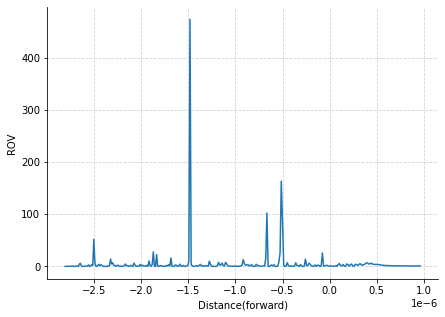

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(dist_fwd[N : np.size(dist_fwd) - N], find_contact_point1(defl_fwd, N)[0])
ax.set_xlabel("Distance(forward)")
ax.set_ylabel("ROV")

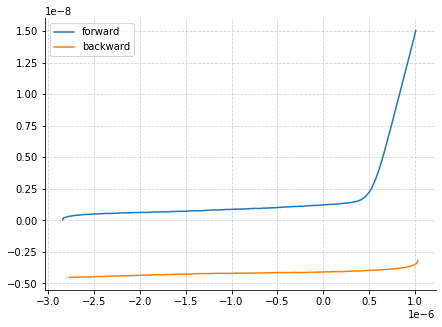

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(dist_fwd, defl_fwd, label="forward")
ax.plot(dist_bwd, defl_bwd, label="backward")
ax.legend()

In [14]:
# Find contact point
cp_fwd = dist_fwd[N + idx_fwd]
cp_bwd = dist_bwd[N + idx_bwd]
print(cp_fwd, cp_bwd)

-1.4820706261219602e-06 -3.4102185295126846e-07


In [15]:
# Translation
dist_fwd = dist_fwd - cp_fwd
dist_bwd = dist_bwd - cp_fwd

In [16]:
# Polynomial fitting
baseline_poly_fwd = fit_baseline_polynomial(dist_fwd, defl_fwd)
defl_processed_fwd = defl_fwd - baseline_poly_fwd(dist_fwd)
baseline_poly_bwd = fit_baseline_polynomial(dist_bwd, defl_bwd)
defl_processed_bwd = defl_bwd - baseline_poly_bwd(dist_bwd)

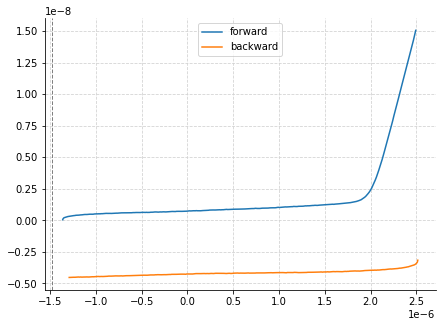

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(dist_fwd, defl_fwd, label="forward")
ax.plot(dist_bwd, defl_bwd, label="backward")
plt.axvline(cp_fwd, color="grey", linestyle="--", linewidth=1)
ax.legend()

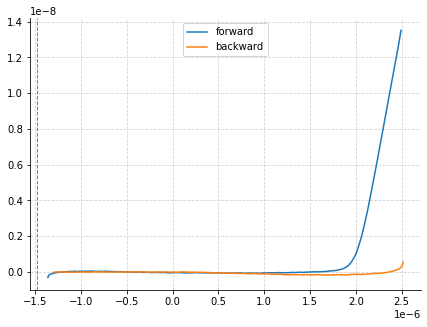

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(dist_fwd, defl_processed_fwd, label="forward")
ax.plot(dist_bwd, defl_processed_bwd, label="backward")
plt.axvline(cp_fwd, color="grey", linestyle="--", linewidth=1)
ax.legend()

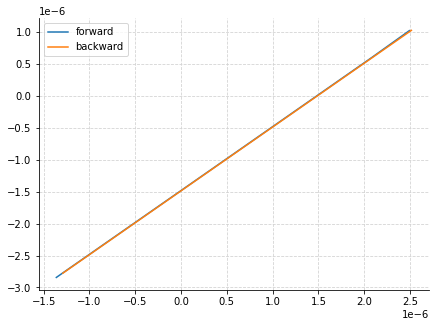

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(dist_fwd, z_fwd, label="forward")
ax.plot(dist_bwd, z_bwd, label="backward")
ax.legend()

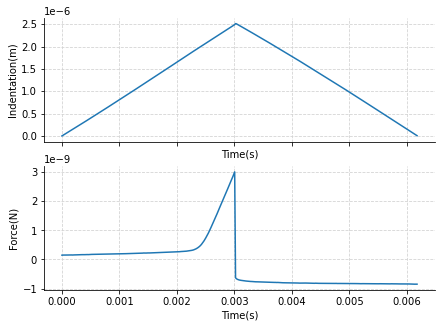

In [20]:
dist_total = np.concatenate((dist_fwd, dist_bwd[::-1]), axis=-1)
defl_total = np.concatenate((defl_fwd, defl_bwd[::-1]), axis=-1)
is_contact = dist_total >= 0
indentation = dist_total[is_contact]
k = 0.2  # N/m
force = defl_total[is_contact] * k
sampling_rate = get_sampling_rate(config)
time = np.arange(len(indentation)) / sampling_rate

fig, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
axes[0].plot(time, indentation)
axes[0].set_xlabel("Time(s)")
axes[1].set_xlabel("Time(s)")
axes[0].set_ylabel("Indentation(m)")
axes[1].set_ylabel("Force(N)")
axes[1].plot(time, force)

In [21]:
max_ind = np.argmax(indentation)
t_max = time[max_ind]
t_max
indent_max = indentation[max_ind]

In [22]:
Polynomial.fit(
    time[: max_ind + 1],
    indentation[: max_ind + 1],
    deg=[
        1,
    ],
).convert()

Polynomial([-1.26103033e-06,  8.34776603e-04], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [23]:
Polynomial.fit(
    time[max_ind + 1 :],
    indentation[max_ind + 1 :],
    deg=[
        1,
    ],
).convert()

Polynomial([ 3.68676017e-06, -8.00051372e-04], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [24]:
indent_max / t_max

0.0008325110694360607

In [25]:
indent_max / (time[-1] - t_max)

0.000796314935982319

In [26]:
v_avg = 2 * indent_max / time[-1]

In [27]:
np.savez(
    "./Image00801.npz",
    indentation=indentation,
    time=time,
    force=force,
    v=v_avg,
    t_max=t_max,
)

In [28]:
forward, backward = data["spec forward"], data["spec backward"]

data

{'spec forward': <xarray.Dataset>
 Dimensions:        (z-axis: 319, specpoint: 1)
 Coordinates:
   * z-axis         (z-axis) float64 -5.5e-06 -5.489e-06 ... -2.077e-06
   * specpoint      (specpoint) float64 1.0
 Data variables:
     deflection     (z-axis, specpoint) float64 4.951e-11 1.381e-10 ... 1.505e-08
     z-axis sensor  (z-axis, specpoint) float64 -2.844e-06 ... 1.026e-06
 Attributes:
     name:     None,
 'spec backward': <xarray.Dataset>
 Dimensions:        (z-axis: 310, specpoint: 1)
 Coordinates:
   * z-axis         (z-axis) float64 -5.5e-06 -5.489e-06 ... -2.077e-06
   * specpoint      (specpoint) float64 1.0
 Data variables:
     deflection     (z-axis, specpoint) float64 -4.524e-09 ... -3.16e-09
     z-axis sensor  (z-axis, specpoint) float64 -2.777e-06 ... 1.03e-06
 Attributes:
     name:     None,
 'indentationzsensorfwd0': <xarray.Dataset>
 Dimensions:                (namex0: 1024, dim1: 1)
 Coordinates:
   * namex0                 (namex0) float64 0.0 0.0 0.0 0.0 ..

In [29]:
forward, backward = data["spec forward"], data["spec backward"]

print(data.keys())

dict_keys(['spec forward', 'spec backward', 'indentationzsensorfwd0', 'indentationzsensorbwd0', 'indentationdeflfwd0', 'indentationdeflbwd0', 'slopeout00', 'slopeout10', 'slopeout20', 'maxadhesionout00', 'maxadhesionout10', 'slopeout01', 'slopeout11', 'slopeout21', 'snapinout00', 'snapinout10', 'scan forward', 'scan backward', 'spec fwd pause'])


In [30]:
forward, backward = data["spec forward"], data["spec backward"]
pause = data["spec fwd pause"]
pause

<xarray.Dataset>
Dimensions:        (dim0: 65534, specpoint: 1)
Coordinates:
  * dim0           (dim0) float64 0.0 1.526e-05 3.052e-05 ... 1.0 1.0 1.0
  * specpoint      (specpoint) float64 1.0
Data variables:
    deflection     (dim0, specpoint) float64 1.516e-08 1.434e-08 ... -3.136e-09
    z-axis sensor  (dim0, specpoint) float64 1.03e-06 1.034e-06 ... 1.03e-06
Attributes:
    name:     None

In [31]:
forward, backward = data["spec forward"], data["spec backward"]
pause = data["spec fwd pause"]
print(pause.keys())

KeysView(<xarray.Dataset>
Dimensions:        (dim0: 65534, specpoint: 1)
Coordinates:
  * dim0           (dim0) float64 0.0 1.526e-05 3.052e-05 ... 1.0 1.0 1.0
  * specpoint      (specpoint) float64 1.0
Data variables:
    deflection     (dim0, specpoint) float64 1.516e-08 1.434e-08 ... -3.136e-09
    z-axis sensor  (dim0, specpoint) float64 1.03e-06 1.034e-06 ... 1.03e-06
Attributes:
    name:     None)


In [32]:
forward, backward = data["spec forward"], data["spec backward"]
pause = data["spec fwd pause"]
print(list(pause.keys()))

['deflection', 'z-axis sensor']


In [33]:
from configparser import ConfigParser

import numpy as np
from numpy import ndarray
import xarray as xr
import kneed
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
from jhelabtoolkit.io.nanosurf import nanosurf
from jhelabtoolkit.utils.plotting import configure_matplotlib_defaults

configure_matplotlib_defaults()

filepath = "data/20231110_onion/Image02676.nid"
config, data = nanosurf.read_nid(filepath)

In [34]:
def get_sampling_rate(nid_config: ConfigParser) -> float:
    spec_config = dict(config[r"DataSet\DataSetInfos\Spec"])
    num_points = int(spec_config["data points"])
    # May later use the pint library to parse unitful quantites
    modulation_time = float(spec_config["modulation time"].split(" ")[0])
    return num_points / modulation_time

get_sampling_rate(config)

65536.0

In [35]:
forward, backward = data["spec forward"], data["spec backward"]
pause = data["spec fwd pause"]
print(list(pause.keys()))

['deflection', 'z-axis sensor']


In [36]:
forward, backward = data["spec forward"], data["spec backward"]
pause = data["spec fwd pause"]
print(list(pause.keys()))

['deflection', 'z-axis sensor']


In [37]:
forward, backward = data["spec forward"], data["spec backward"]
forward_pause, backward_pause = data["spec fwd pause"]
print(list(pause.keys()))

['deflection', 'z-axis sensor']


In [38]:
forward_pause

'deflection'

In [39]:
print(forward_pause)

deflection


연결된 커널 없음